In [24]:
import numpy as np
import matplotlib.cbook as cbook 
import matplotlib.image as image 
import matplotlib.pyplot as plt
import imageio
import cv2
%matplotlib inline

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


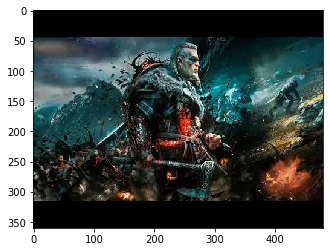

In [56]:
# Read in the image
image = cv2.imread('AC1.jpg')
  
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image)
  
plt.imshow(image)

In [57]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
  
# Convert to float type
pixel_vals = np.float32(pixel_vals)
print(pixel_vals)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


0
[[ 14.432718  20.257458  18.38645 ]
 [ 89.73231  110.376686 107.91915 ]]
464474805.65536976
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]

[[ 14  20  18]
 [ 89 110 107]]
segment_data [[14 20 18]
 [14 20 18]
 [14 20 18]
 ...
 [14 20 18]
 [14 20 18]
 [14 20 18]]


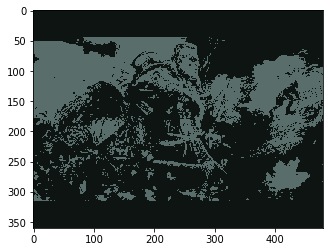

In [67]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

print(cv2.KMEANS_RANDOM_CENTERS)
  
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initally chosed for k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
print(centers)
print(retval)
print(labels)
# convert data into 8-bit values
print()
centers = np.uint8(centers)
print(centers)
segmented_data = centers[labels.flatten()]
print("segment_data",segmented_data)
  
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
  
plt.imshow(segmented_image)

In [97]:
# Distance function (euclidean)
def d(x1,x2):
    return np.sqrt(sum(np.square(np.power((x1-x2),2))))

# Takes in image, reads it, and makes the values smaller to work with
def read_image(img):    
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #image = image / 255

    return image

#plt.imshow(image)

# Reshapes image into (x*y, RGB) matrix and initializes random n clusters for n = k value
def clusters(image, kval):
    image1 = np.float32(image)
    imageMatrix = np.reshape(image1, (image1.shape[0] * image1.shape[1], image1.shape[2]))  

    #print(imageMatrix.shape)

    m, n = imageMatrix.shape

    k = kval
    
    centroids = np.zeros((k, n))
    
    #print(centroids)

    
    for i in range(k): 
            rand1 = int(np.random.randint(len(imageMatrix)))
            rand2 = int(np.random.randint(len(imageMatrix)))
            rand3 = int(np.random.randint(len(imageMatrix)))
            centroids[i, 0] = imageMatrix[rand1, 0] 
            centroids[i, 1] = imageMatrix[rand2, 1] 
            centroids[i, 2] = imageMatrix[rand3, 2]
    #print(centroids) 
    #print(imageMatrix)
    return imageMatrix, centroids


def k_means(imageMatrix, centroids, kval):
    
    k_no = kval
    m, n = imageMatrix.shape
    
    x = np.zeros(2)
    y = np.zeros(2)
    
    centroids_old = np.zeros((k_no, n))

    for i in range(k_no): 
            rand1 = int(np.random.randint(len(imageMatrix)))
            rand2 = int(np.random.randint(len(imageMatrix)))
            centroids_old[i, 0] = imageMatrix[rand1, 0] 
            centroids_old[i, 1] = imageMatrix[rand2, 1]
            
    # these are the index values that each pixel gets assinged to 
    index = np.zeros(m)  
    #print('centroids', centroids)
    #print('centroids_old', centroids_old)
    
    
    # k-means                    d(centroids[0], centroids_old[0]) > 1e-20
    while(d(centroids[0], centroids_old[0]) > 1e-20): 
        #print(d(centroids[0], centroids_old[0]))
        centroids_old = centroids
        
        for j in range(len(imageMatrix)): 

            # initialize minimum value to a large value 
            minimum = 1000
            temp = None

            for l in range(k_no):
                
                x[0] = imageMatrix[j, 0]
                x[1] = imageMatrix[j, 1]
                y[0] = centroids[l, 0]
                y[1] = centroids[l, 1]

                if(d(x,y) < minimum):          
                    minimum = d(x,y) 
                    temp = l 
                    index[j] = l  
                                        
        # Changing centroid position
        for k in range(k_no): 

            sumx = 0 
            sumy = 0
            count = 0

            for j in range(len(imageMatrix)): 

                if(index[j] == k): 
                    sumx += imageMatrix[j, 0] 
                    sumy += imageMatrix[j, 1]  
                    count += 1

            if(count == 0): 
                count = 1    

            centroids[k, 0] = float(sumx / count) 
            centroids[k, 1] = float(sumy / count)      
   
    return centroids, index, centroids_old

# Restores the image into correct shape with assigning RGB values of cluster to specific pixel
def compress(centroids, index, image):    
    imgCompressed = centroids[index.flatten().astype(int)]
    imgCompressed = np.reshape(imgCompressed, (image.shape[0], image.shape[1], image.shape[2]))
    #print(imgCompressed)
    plt.imshow(imgCompressed) 
    plt.show()

In [98]:
ima = read_image('AC1.jpg')
print(ima.shape)
#pixel_vals = ima.reshape((-1,3))
print(pixel_vals)
pixel_vals = np.float32(pixel_vals)
print(pixel_vals.shape[0])
print(pixel_vals.shape[1])
imageMatrix, centroids = clusters(ima, 4)

print(imageMatrix)


(360, 480, 3)
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
172800
3
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


This is the original image:


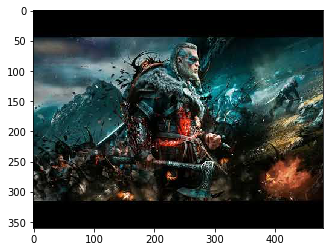

[[  0  25 142]
 [151 133  38]
 [ 96 158  93]
 [221  13  79]
 [ 41 116 139]
 [ 71 168   0]
 [  6 198   7]
 [  0 107  58]
 [134  68  54]
 [102  27  34]
 [ 63 148   6]
 [ 88   0  36]
 [ 22   0 107]
 [  6  66  91]
 [ 92   0  12]
 [ 28   0 147]
 [  0  65  12]
 [ 48  31   0]
 [  0   8   0]
 [ 17  42   0]
 [146   0  50]
 [ 95  76 111]
 [ 28 119   0]
 [ 19   9  77]
 [  0  15  67]
 [ 58  11   0]
 [ 90   0  24]
 [  0   0   2]
 [215  20  22]
 [  5  79  46]
 [  4  45  81]
 [  0   0  40]
 [  0  83  64]
 [  0  69 163]
 [ 16 124   0]
 [  1  50  91]
 [  0  45  67]
 [  9  31  34]
 [ 78  50   0]
 [103  13  12]
 [  8   0   0]
 [ 17  12 175]
 [ 23  52   3]
 [  0 134  50]
 [ 34   0 149]
 [  0  77 155]
 [  0   0  49]
 [ 16 154   9]
 [ 67  60  43]
 [ 55 137 149]
 [  2   0   0]
 [148  17   0]
 [131   0  50]
 [ 52   0   4]
 [ 96  23  14]
 [  0 141   0]
 [ 16 139  68]
 [  0  50   0]
 [  0  41  13]
 [  0   0   4]
 [  0  16   0]
 [ 67  31   0]
 [ 36  15   0]
 [ 34  71  37]]
This is the image that has been compres

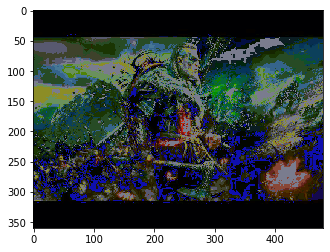

In [102]:
print('This is the original image:')

O_image2 = plt.imread('AC1.jpg')
plt.imshow(O_image2)
plt.show()

image2 = read_image('AC1.jpg')

kval2 = 64

imageMatrix, centroids = clusters(image2, kval2) 
centroids = np.uint8(centroids)
print(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

In [92]:
print(centroids[index.flatten().astype(int)])

[[33 41 63]
 [33 41 63]
 [33 41 63]
 ...
 [33 41 63]
 [33 41 63]
 [33 41 63]]
